<h1>Welcome to my nootebook</h1>

The nootebook objective is to analyse and try to understand some Indians Startup Patterns.<br>

Some informations about dataset below




<h2>Content</h2><br>
This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).<br>


<h2>Inspiration</h2>
Possible questions which could be answered are:<br>
- How does the funding ecosystem change with time?<br>
- Do cities play a major role in funding?<br>
- Which industries are favored by investors for funding?<br>
- Who are the important investors in the Indian Ecosystem?<br>
- How much funds does startups generally get in India?<br>

<h2>Importing the librarys</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<h2>Importing the data</h2>

In [2]:
df_startups = pd.read_csv("startup_funding.csv",index_col=0)

<h2>Knowning our data</h2>

In [3]:
print(df_startups.shape)
print(df_startups.nunique())
print(df_startups.info())

(2372, 9)
Date                 695
StartupName         2001
IndustryVertical     743
SubVertical         1364
CityLocation          71
InvestorsName       1885
InvestmentType         7
AmountInUSD          328
Remarks               69
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 9 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: object(9)
memory usage: 185.3+ KB
None


<h2>Looking the NaN's</h2>

In [4]:
# missing data 
total = df_startups.isnull().sum().sort_values(ascending = False)
percent = ((df_startups.isnull().sum()/df_startups.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data

,Total,Percent %
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
StartupName,0,0.000000
Date,0,0.000000


<h2>Looking the data</h2>
<p>As remarks has to many nul value so it will be better if we delete them</p>

In [5]:
del df_startups["Remarks"]
df_startups.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
SNo,,,,,,,,
0,01-08-17,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02-08-17,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02-08-17,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02-08-17,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02-08-17,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [6]:
df_startups.shape

(2372, 8)

<h2>Fix the date column data</h2> 

In [7]:
df_startups['Date'] = pd.to_datetime(df_startups.Date)
df_startups.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
SNo,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


<h2>Ques 1: How does the funding ecosystem change with time ?</h2>

In [8]:
df_startups["yearmonth"] = (pd.to_datetime(df_startups['Date']).dt.year*100)+(pd.to_datetime(df_startups['Date']).dt.month)
temp = df_startups['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 20)\n",temp)
year_month = df_startups['yearmonth'].value_counts()

Number of funding per month in decreasing order(Top 20)
 201604    102
201601    100
201509     98
201608     95
201507     94
201606     93
201511     89
201503     85
201508     83
201506     82
Name: yearmonth, dtype: int64


In [11]:
def bar_chart(column_name, x_labbel, y_label, plot_title):
    """
    input:  
    column_name:- from data frame for which we will plot the graph.
    x_labbel:- X label of the graph.
    y_labbel:- Y label of the graph.
    plot_title:- Title of the plot.
    
    output: We will plot the Bar graph.
    """
    
    plt.figure(figsize=(15,8))
    sns.barplot(column_name.index, column_name.values, alpha=0.9)
    plt.xticks(rotation='vertical')
    plt.xlabel(x_labbel, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(plot_title, fontsize=16)
    plt.show()
    

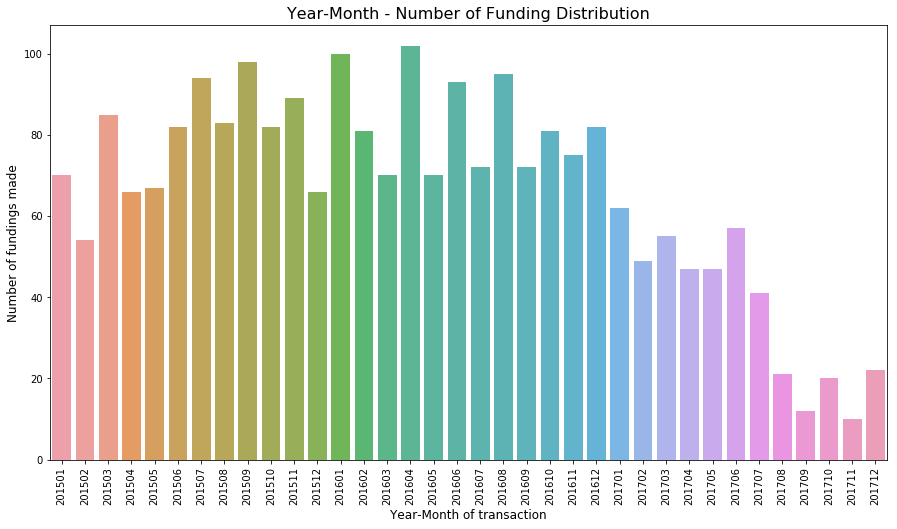

In [12]:
bar_chart(year_month, 'Year-Month of transaction', 'Number of fundings made', 'Year-Month - Number of Funding Distribution' )

<b>Year-Month - Amount of Funding distribution<b>

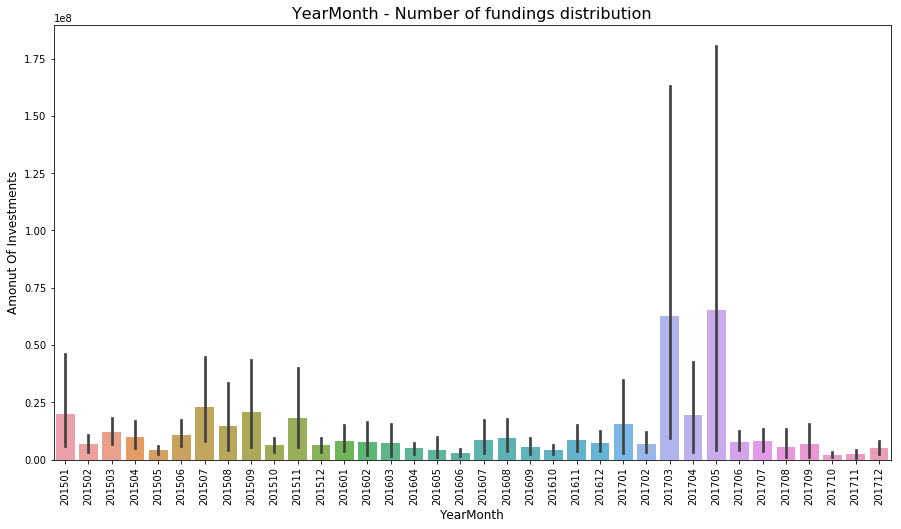

In [34]:
#Now convert the string "AmountInUSD" into numeric
df_startups["AmountInUSD"] = df_startups["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_startups["AmountInUSD"] = pd.to_numeric(df_startups["AmountInUSD"])

plt.figure(figsize=(15,8))
sns.barplot(df_startups['yearmonth'], df_startups['AmountInUSD'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('YearMonth', fontsize=12)
plt.ylabel('Amonut Of Investments', fontsize=12)
plt.title("YearMonth - Number of fundings distribution", fontsize=16)
plt.show()

<p>As we can see that startups got more funding in January 2016(Total funding in January 2016 are 104). Above visualization shows how funding varies from one month to another.</p>
<p>goverment of india launched <b>Digitial India</b> Campaign on July 2015 see that funding got increese from that time.
simliar chnages we can see when Goverment of india started the <b>startup india</b> intiative on jaunary 2016 where startup funding got incresed by and reaches at its peek by feb 2016.</p>
<p>one intresting fact we can see during the time of <b>demonetization</b> nov 2017 onwards funding got decresse signifinctly.</p>

<h2>Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)</h2>

<h4>2.1:- Maximum funding to a Startups</h4>

In [60]:
print("Maximum funding to a Startups is : ",df_startups["AmountInUSD"].dropna().sort_values().max())
df_startups[df_startups.AmountInUSD > 200000000.0]

Maximum funding to a Startups is :  1400000000.0


,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
SNo,,,,,,,,,
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
217,2017-04-14,Ola Cabs,Consumer Internet,Cab Aggregator App,Bangalore,SIMI Pacific Pte,Private Equity,2.600000e+08,201704
234,2017-04-24,Oyo Rooms,Consumer Internet,Branded Budget Hotels Aggregator,Gurgaon,"SoftBank Vision Fund, Lightspeed Venture Partn...",Private Equity,2.500000e+08,201704
252,2017-01-03,Ola,Consumer Internet,App based cab aggregator,Bangalore,SoftBank Group Corp,Private Equity,3.300000e+08,201701
294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
1572,2015-11-18,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,5.000000e+08,201511
1743,2015-09-14,Ola Cabs,Cab rental Mobile app,NaN,Bangalore,"Falcon Edge Capital, NY based Hedge Fund, Tige...",Private Equity,2.250000e+08,201509
1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
1798,2015-01-08,Snapdeal,Ecommerce Marketplace,NaN,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,5.000000e+08,201501


In [62]:
print("Minimum funding to a Startups is : ",df_startups["AmountInUSD"].dropna().sort_values().min())
df_startups[df_startups.AmountInUSD == 16000.0]

Minimum funding to a Startups is :  16000.0


,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
SNo,,,,,,,,,
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


In [64]:
print("On Average indian startups got funding of : ",df_startups["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


Total startups funded :  2001
Swiggy           7
UrbanClap        6
Jugnoo           5
Medinfi          5
NoBroker         5
Paytm            5
Simplilearn      4
HolaChef         4
Ola              4
Capital Float    4
Name: StartupName, dtype: int64


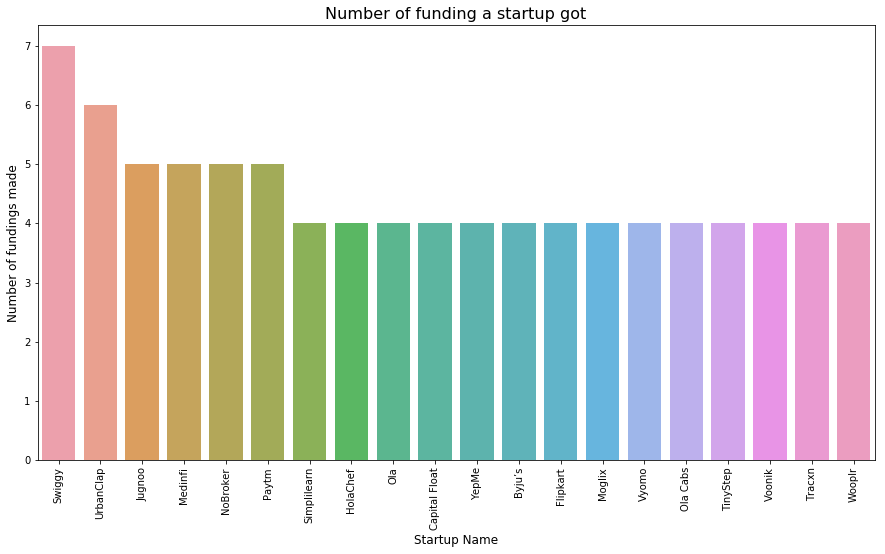

In [14]:
print("Total startups funded : ", len(df_startups["StartupName"].unique()))
print(df_startups["StartupName"].value_counts().head(10))
startupname = df_startups['StartupName'].value_counts().head(20)

bar_chart(startupname, 'Startup Name', 'Number of fundings made', 'Number of funding a startup got')


<p>As we can see that Swiggy got maximum number of fundings(Total funding = 7) and total there are 2001 indian startups funded from January 2015 to August 2017. The above visulization is only for Top 20 startups.</p>

<h2>Ques 3 : Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?</h2>

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64


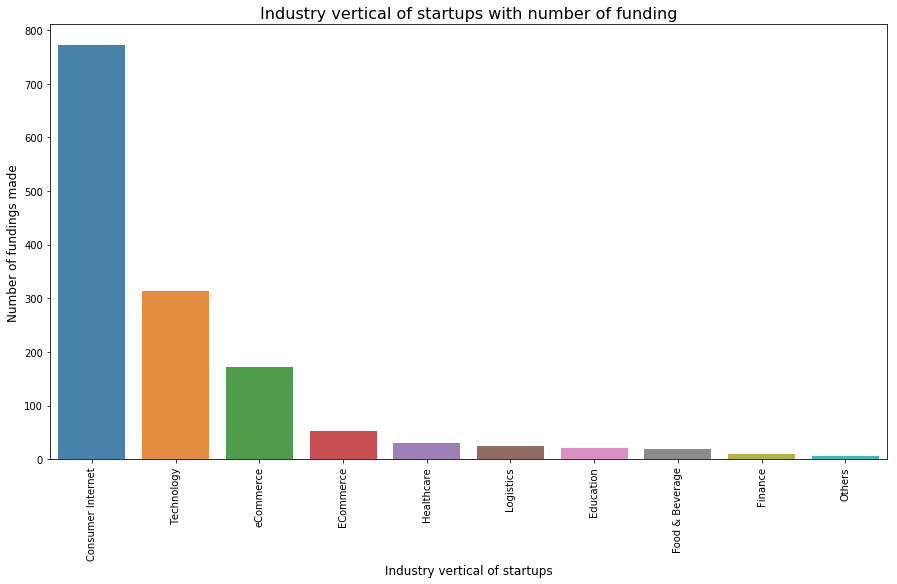

In [16]:
industry = df_startups['IndustryVertical'].value_counts().head(10)
print(industry)

bar_chart(industry, 'Industry vertical of startups', 'Number of fundings made', 'Industry vertical of startups with number of funding')

Online Pharmacy                   9
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          4
Data Analytics platform           3
Online Payment Gateway            3
Fitness Mobile App                3
ECommerce Marketplace             3
Online ticket booking platform    2
Contact Management Mobile App     2
Name: SubVertical, dtype: int64


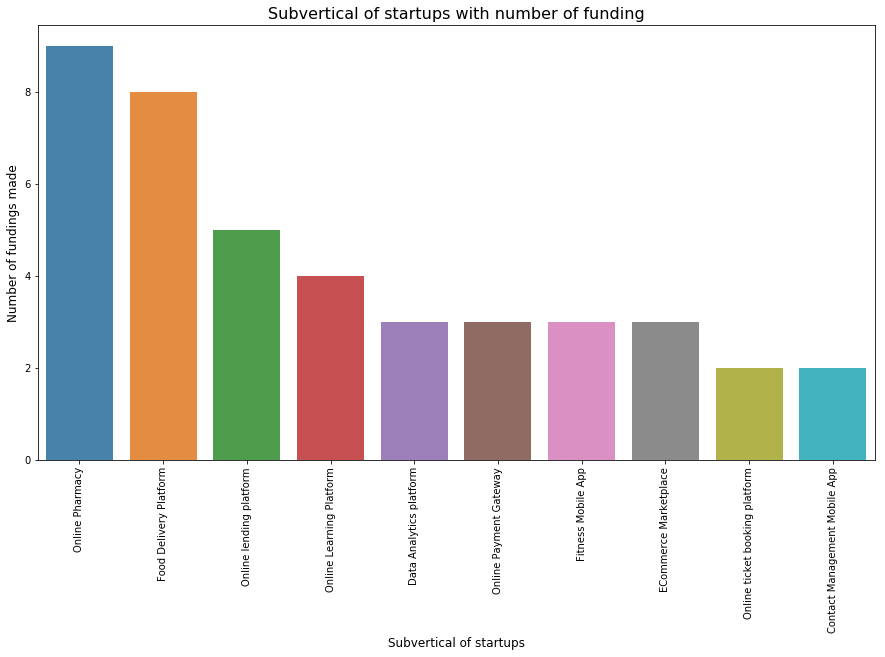

In [18]:
industry = df_startups['SubVertical'].value_counts().head(10)
print(industry)

bar_chart(industry, 'Subvertical of startups', 'Number of fundings made', 'Subvertical of startups with number of funding')

<h2>Ques 4 : Do cities play a major role in funding or which city has more start up ?</h2>

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


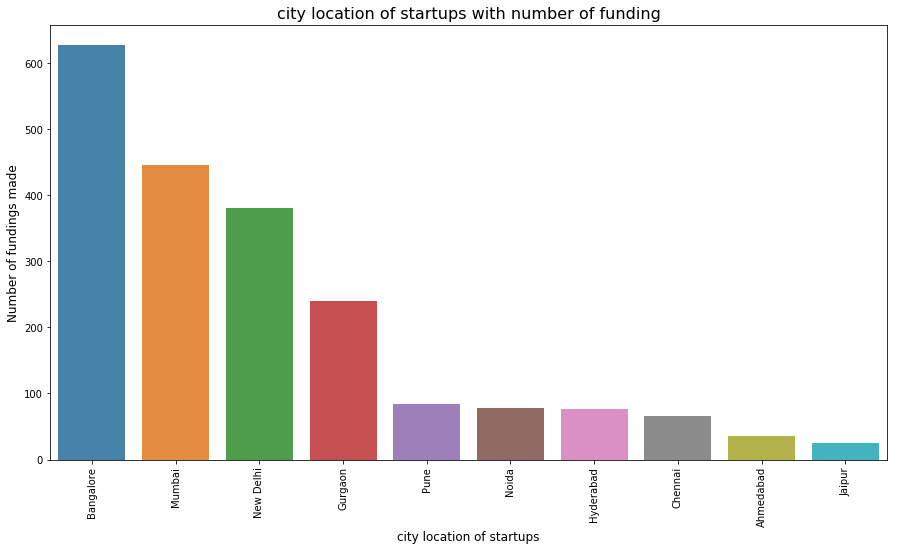

In [19]:
city = df_startups['CityLocation'].value_counts().head(10)
print(city)

bar_chart(city, 'city location of startups', 'Number of fundings made', 'city location of startups with number of funding' )

<h2>Ques 5 : Who is the important investors in the Indian Ecosystem?</h2>

Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Undisclosed Investor        10
RoundGlass Partners         10
Name: InvestorsName, dtype: int64


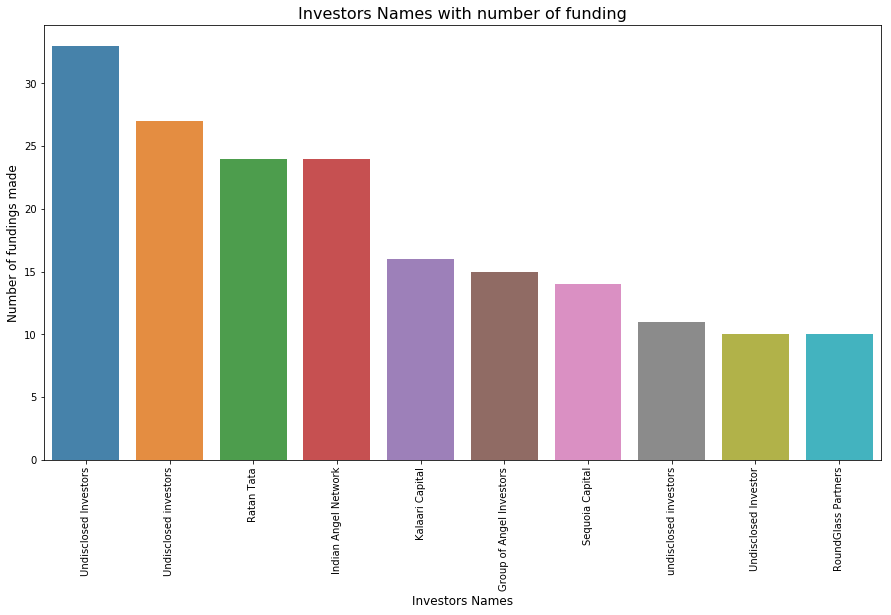

In [20]:
investors = df_startups['InvestorsName'].value_counts().head(10)
print(investors)

bar_chart(investors,'Investors Names','Number of fundings made','Investors Names with number of funding')

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Crowd Funding        1
Crowd funding        1
PrivateEquity        1
Debt Funding         1
Name: InvestmentType, dtype: int64


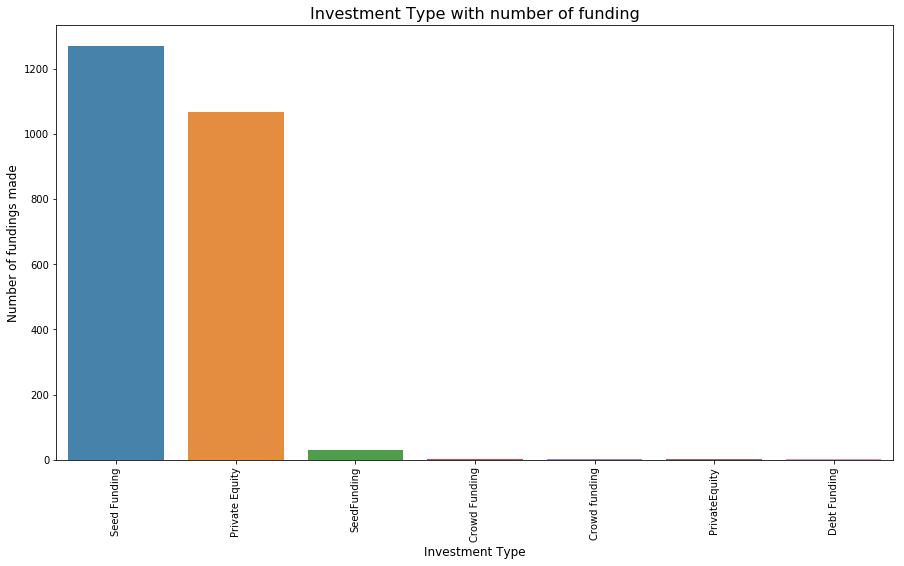

In [21]:
investment = df_startups['InvestmentType'].value_counts()
print(investment)

bar_chart(investment,'Investment Type','Number of fundings made','Investment Type with number of funding')